# Feature Scaling and Regularization

In [44]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [45]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.labelpad'] = 10

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

## Generate some initial data and plot

In [46]:
x = np.linspace(-4, 3, 30)

np.random.seed(872384)

w_0 = 5
w_1 = 7
w_2 = 2
y = w_0 + w_1 * x +  w_2 * (x**2) + 10*np.random.random(size=x.size)

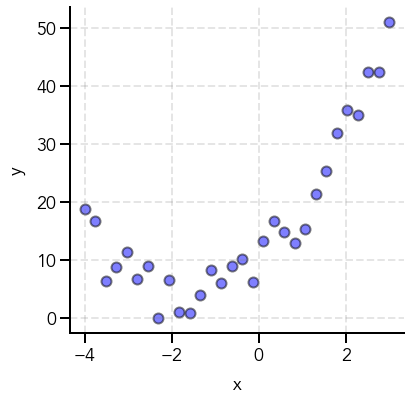

In [4]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Define cost and gradient descent functions

In [5]:
def cost_function(X, y, w):
    """
    Computes the cost function of the linear regression
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
    
    Returns
        (float): cost value
    """
    
    m = len(y)
    return (1/(2*m))*sum((np.dot(X, w) - y)**2)[0]

In [6]:
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Uses gradient descent to minimize the cost function
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        alpha (float): learning rate
        num_iters (int): number of iterations
    
    Returns
        J (np.array): cost function at each iteration
        w_new (np.array): optimized weights
        w_hist (np.array): weights at each timestep
    """
    
    w_new = np.copy(w)
    w_hist = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)
    
    for i in range(num_iters):
        w_new = w_new - (alpha/m)*(np.dot((np.dot(X, w_new) - y).T, X)).T
        w_hist = np.concatenate((w_hist, w_new), axis=1)
        J[i] = cost_function(X, y, w_new)
    return J, w_new, w_hist

## Define function to normalize features by the total magnitude of each specific feature

In [7]:
def normalize_features(X):
    X_new = np.copy(X)
    norms = np.linalg.norm(X_new, axis=0)
    return X_new/norms, norms

## Train model with correct number of features  
&nbsp;  

### Initialize Variables  
Since $x^2$ grows much faster than $x$, we will normalize our features &ndash; this will be essential if we add higher order polynomial features

In [8]:
# Initialize variables
X = np.concatenate((np.ones(shape=(len(x), 1)), x.reshape(len(x), 1), (x**2).reshape(len(x), 1)), axis=1)
X_scale, norms = normalize_features(X)
y = y.reshape(len(x), 1)
w = np.zeros(shape=(X.shape[1], 1))

### Calculate initial value of cost function

In [9]:
initial_cost = cost_function(X_scale, y, w)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 221.29


### Train the model and plot the value of the cost function

In [10]:
J, w_train, _ = gradient_descent(X_scale, y, w, 0.1, 2000)

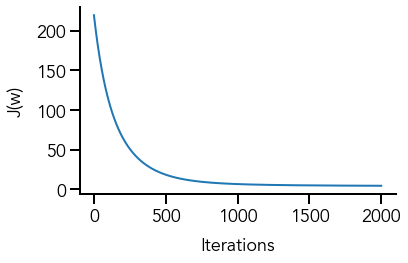

In [11]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

# Set axis labels
ax.set(xlabel='Iterations', ylabel='J(w)')

plt.tight_layout()
plt.show()

### Rescale the weights by the same normalization factors

In [12]:
w_train = w_train/(norms.reshape(len(norms), 1))

In [13]:
print('Calculated values of w:' +
      '\nw_0 = %.2f' % w_train[0] +
      '\nw_1 = %.2f' % w_train[1] + 
      '\nw_2 = %.2f' % w_train[2])

Calculated values of w:
w_0 = 10.96
w_1 = 6.64
w_2 = 1.92


### Plot fit overlaid on original data

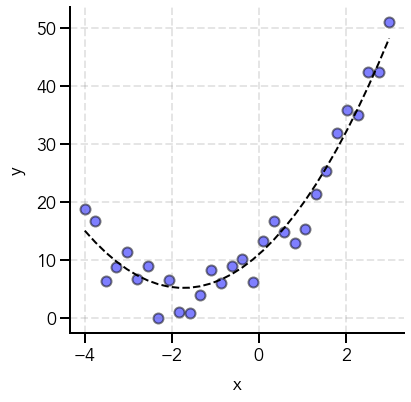

In [14]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

ax.plot(x, w_train[0] + w_train[1]*x + w_train[2]*(x**2), linestyle='--', linewidth=2, color='black')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

# Set axis limits
#ax.set(ylim=(-2, 5))

plt.show()

## Intentionally underfit data with a 1 degree polynomial  
&nbsp;  

### Initialize variables  
We don't need to normalize the this time features since our highest order is linear

In [15]:
X = np.concatenate((np.ones(shape=(len(x), 1)), x.reshape(len(x), 1)), axis=1)
y = y.reshape(len(x), 1)
w = np.zeros(shape=(X.shape[1], 1))

### Calculate initial value of cost function

In [16]:
initial_cost = cost_function(X, y, w)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 221.29


### Train model and plot value of cost function

In [17]:
J, w_train, _ = gradient_descent(X, y, w, 0.1, 100)

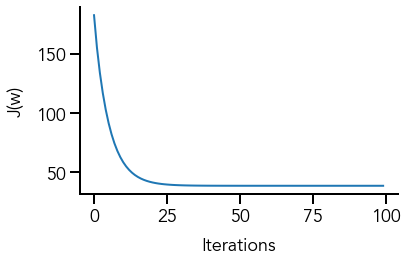

In [18]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

# Set axis labels
ax.set(xlabel='Iterations', ylabel='J(w)')

plt.tight_layout()
plt.show()

### Weights calculated from gradient descent

In [19]:
print('Calculated values of w:' +
      '\nw_0 = %.2f' % w_train[0] +
      '\nw_1 = %.2f' % w_train[1])

Calculated values of w:
w_0 = 18.67
w_1 = 4.79


### Plot fit overlaid on original data

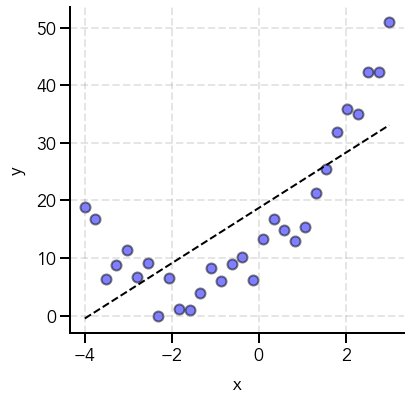

In [20]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

ax.plot(x, w_train[0] + w_train[1]*x, linestyle='--', linewidth=2, color='black')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

# Set axis limits
#ax.set(ylim=(-2, 5))

plt.show()

## Intentionally overfit data with a 6 degree polynomial  
&nbsp;  

### Initialize variables  
We must normalize our features since we have an $x^6$ term that grows rapidly

In [76]:
X = np.concatenate((np.ones(shape=(len(x), 1)), x.reshape(len(x), 1), (x**2).reshape(len(x), 1), (x**3).reshape(len(x), 1),
                    (x**4).reshape(len(x), 1), (x**5).reshape(len(x), 1), (x**6).reshape(len(x), 1)), axis=1)
X_scale, norms = normalize_features(X)
y = y.reshape(len(x), 1)
w = np.zeros(shape=(X.shape[1], 1))

### Calculate initial value of cost function

In [22]:
initial_cost = cost_function(X_scale, y, w)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 221.29


### Train model and plot value of cost function

In [23]:
J, w_train, _ = gradient_descent(X_scale, y, w, 4, 200)

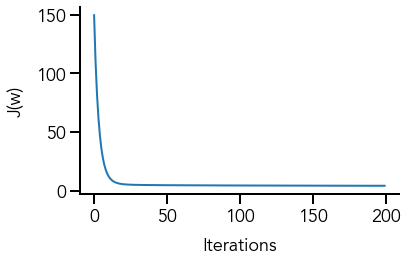

In [24]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

# Set axis labels
ax.set(xlabel='Iterations', ylabel='J(w)')

plt.tight_layout()
plt.show()

In [25]:
w_train = w_train/norms.reshape(len(norms), 1)

In [26]:
print('Calculated values of w:' +
      '\nw_0 = %.2f' % w_train[0] +
      '\nw_1 = %.2f' % w_train[1] +
      '\nw_2 = %.2f' % w_train[2] +
      '\nw_3 = %.2f' % w_train[3] +
      '\nw_4 = %.2f' % w_train[4] +
      '\nw_5 = %.2f' % w_train[5] +
      '\nw_6 = %.2f' % w_train[6])

Calculated values of w:
w_0 = 10.96
w_1 = 6.01
w_2 = 1.40
w_3 = 0.16
w_4 = 0.06
w_5 = 0.00
w_6 = 0.00


### Plot fit overlaid on original data

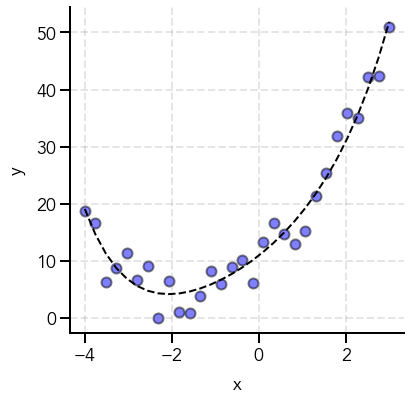

In [27]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

ax.plot(x, w_train[0] + w_train[1]*x + w_train[2]*(x**2) + w_train[3]*(x**3) + w_train[4]*(x**4) + w_train[5]*(x**5) + 
        w_train[6]*(x**6), linestyle='--', linewidth=2, color='black')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')


plt.show()

## Use ridge regression to fit the $x^6$ functional form  
&nbsp;  

### Cost function with ridge regression
&nbsp;  

### $J(w_0 \ldots w_n) = \dfrac{1}{2m}\left[ \sum\limits_{i = 1}^{m}\left(h_w(x^{(i)}) - y^{(i)}\right)^2 + \lambda \sum\limits_{j = 1}^{n} w_j^{2} \right]$  
with <b>hypothesis function</b>  
### $h_w(x^{(i)}) = \sum\limits_{j = 0}^n w_j x_j^{(i)}$

In [103]:
def cost_function_ridge(X, y, w, lam):
    """
    Computes the cost function of the linear regression
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        lam (float): regularization parameter
    
    Returns
        (float): cost value
    """
    
    m = len(y)
    lam_vec = lam*np.ones(shape=(len(w), 1))
    lam_vec[0] = 0
    return (1/(2*m))*(sum((np.dot(X, w) - y)**2) + np.dot(lam_vec.T, w**2))[0]

In [109]:
initial_cost = cost_function_ridge(X_scale, y, w, 1)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 221.29


### Gradient descent with ridge regression  
&nbsp;  

### $\dfrac{\partial J}{\partial w_j} = \dfrac{1}{m} \left[ \sum\limits_{i = 1}^{m} \left( h_w(x^{(i)}) - y^{(i)}\right) \cdot x_j^{(i)} + \underbrace{\lambda w_j}_{\textrm{for }j > 0} \right]$  
&nbsp;  

### $w_j = w_j - \dfrac{\alpha}{m} \left[ \sum\limits_{i = 1}^{m} \left( h_w(x^{(i)}) - y^{(i)}\right) \cdot x_j^{(i)} + \underbrace{\lambda w_j}_{\textrm{for }j > 0} \right]$ 

In [104]:
def gradient_descent_ridge(X, y, w, lam, alpha, num_iters):
    """
    Uses gradient descent to minimize the cost function
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        lam (float): regularization parameter
        alpha (float): learning rate
        num_iters (int): number of iterations
    
    Returns
        J (np.array): cost function at each iteration
        w_new (np.array): optimized weights
        w_hist (np.array): weights at each timestep
    """
    
    lam_vec = lam*np.ones(shape=(len(w), 1))
    lam_vec[0] = 0
    w_new = np.copy(w)
    w_hist = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)
    
    for i in range(num_iters):
        w_new = w_new - (alpha/m)*(np.dot((np.dot(X, w_new) - y).T, X) + np.multiply(lam_vec, w_new).T).T
        w_hist = np.concatenate((w_hist, w_new), axis=1)
        J[i] = cost_function(X, y, w_new)
    return J, w_new, w_hist

In [108]:
J, w_train, _ = gradient_descent_ridge(X_scale, y, w, 0.4, 4, 200)

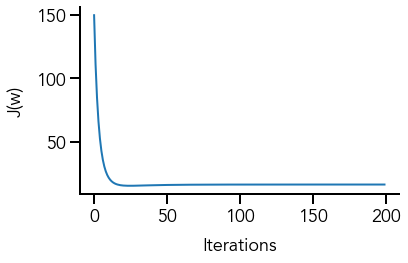

In [99]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

# Set axis labels
ax.set(xlabel='Iterations', ylabel='J(w)')

plt.tight_layout()
plt.show()

In [ ]:
w_train = w_train/norms.reshape(len(norms), 1)

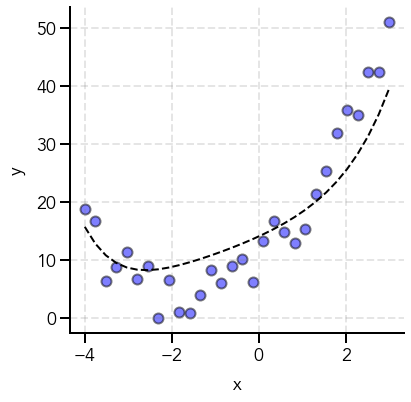

In [101]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

ax.plot(x, w_train[0] + w_train[1]*x + w_train[2]*(x**2) + w_train[3]*(x**3) + w_train[4]*(x**4) + w_train[5]*(x**5) + 
        w_train[6]*(x**6), linestyle='--', linewidth=2, color='black')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')


plt.show()

## Use lasso regression to fit the $x^6$ functional form  
&nbsp;  

### Cost function with lasso regression
&nbsp;  

### $J(w_0 \ldots w_n) = \dfrac{1}{2m}\left[ \sum\limits_{i = 1}^{m}\left(h_w(x^{(i)}) - y^{(i)}\right)^2 + 2\lambda \sum\limits_{j = 1}^{n} |w_j| \right]$  
with <b>hypothesis function</b>  
### $h_w(x^{(i)}) = \sum\limits_{j = 0}^n w_j x_j^{(i)}$

In [106]:
def cost_function_lasso(X, y, w, lam):
    """
    Computes the cost function of the linear regression
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        lam (float): regularization parameter
    
    Returns
        (float): cost value
    """
    
    m = len(y)
    lam_vec = lam*np.ones(shape=(len(w), 1))
    lam_vec[0] = 0
    return (1/(2*m))*(sum((np.dot(X, w) - y)**2) + 2*np.dot(lam_vec.T, np.absolute(w)))[0]

### Gradient descent with lasso regression  
&nbsp;  

### $\dfrac{\partial J}{\partial w_j} = \dfrac{1}{m} \left[ \sum\limits_{i = 1}^{m} \left( h_w(x^{(i)}) - y^{(i)}\right) \cdot x_j^{(i)} + \underbrace{\lambda}_{\textrm{for }j > 0} \right]$  
&nbsp;  

### $w_j = w_j - \dfrac{\alpha}{m} \left[ \sum\limits_{i = 1}^{m} \left( h_w(x^{(i)}) - y^{(i)}\right) \cdot x_j^{(i)} + \underbrace{\lambda}_{\textrm{for }j > 0} \right]$ 

In [107]:
def gradient_descent_lasso(X, y, w, lam, alpha, num_iters):
    """
    Uses gradient descent to minimize the cost function
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        lam (float): regularization parameter
        alpha (float): learning rate
        num_iters (int): number of iterations
    
    Returns
        J (np.array): cost function at each iteration
        w_new (np.array): optimized weights
        w_hist (np.array): weights at each timestep
    """
    
    lam_vec = lam*np.ones(shape=(len(w), 1))
    lam_vec[0] = 0
    w_new = np.copy(w)
    w_hist = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)
    
    for i in range(num_iters):
        w_new = w_new - (alpha/m)*(np.dot((np.dot(X, w_new) - y).T, X) + lam_vec.T).T
        w_hist = np.concatenate((w_hist, w_new), axis=1)
        J[i] = cost_function(X, y, w_new)
    return J, w_new, w_hist

In [170]:
J, w_train, _ = gradient_descent_lasso(X_scale, y, w, 5, 0.5, 500)

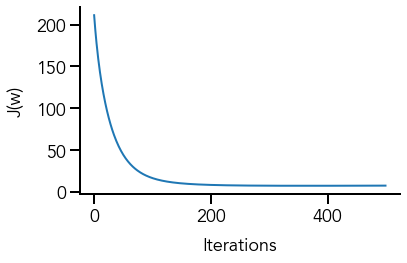

In [171]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

# Set axis labels
ax.set(xlabel='Iterations', ylabel='J(w)')

plt.tight_layout()
plt.show()

In [172]:
w_train = w_train/norms.reshape(len(norms), 1)

In [173]:
print(w_train)

[[ 1.27500064e+01]
 [ 5.78629939e+00]
 [ 1.07691331e+00]
 [ 1.21095856e-01]
 [ 3.17002081e-02]
 [-1.35989156e-02]
 [-7.75280576e-04]]


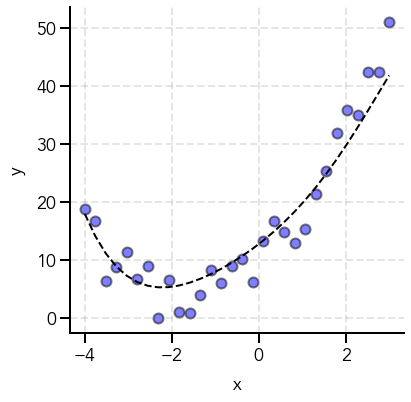

In [174]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot sample data
ax.scatter(x, y, color='blue', s=100, edgecolor='black', linewidth=2, alpha=0.5)

ax.plot(x, w_train[0] + w_train[1]*x + w_train[2]*(x**2) + w_train[3]*(x**3) + w_train[4]*(x**4) + w_train[5]*(x**5) + 
        w_train[6]*(x**6), linestyle='--', linewidth=2, color='black')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')


plt.show()